In [1]:
import os
import cv2  # For image processing
import numpy as np
from sklearn import svm
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Define image size
size = (128, 128)

# Paths for stop sign and non-stop sign images
# TODO: Update these paths to point to your actual folders
path_stop = r"D:\Downloads\STUDYmaterials\445\445 Project\Images\stop_signs"  # Update with your stop signs folder
path_non_stop = r"H:\Fall 25\cse445\project again\GIT-445-Group-08-ML-Project-main\images without street sign"  # Update with your non-stop signs folder

# Lists to store images and labels
images = []
labels = []

# Process stop sign images (label 1)
if not os.path.exists(path_stop):
    print(f"Error: Stop signs folder not found at: {path_stop}")
    print("Please update the path_stop variable with the correct path to your stop signs folder.")
else:
    print(f"Loading stop sign images from: {path_stop}")
    for file_name in os.listdir(path_stop):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            img_path = os.path.join(path_stop, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, size)  # Resize to defined size
                images.append(img)
                labels.append(1)  # Label for stop signs
            else:
                print(f"Warning: Could not read image: {img_path}")
    print(f"Loaded {sum(labels)} stop sign images")

# Process non-stop sign images (label 0)
if not os.path.exists(path_non_stop):
    print(f"Error: Non-stop signs folder not found at: {path_non_stop}")
    print("Please update the path_non_stop variable with the correct path to your non-stop signs folder.")
else:
    print(f"Loading non-stop sign images from: {path_non_stop}")
    non_stop_count = 0
    for file_name in os.listdir(path_non_stop):
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            img_path = os.path.join(path_non_stop, file_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, size)  # Resize to defined size
                images.append(img)
                labels.append(0)  # Label for non-stop signs
                non_stop_count += 1
            else:
                print(f"Warning: Could not read image: {img_path}")
    print(f"Loaded {non_stop_count} non-stop sign images")

print(f"\nTotal images loaded: {len(images)}")
print(f"Stop signs: {sum(labels)}, Non-stop signs: {len(labels) - sum(labels)}")

Error: Stop signs folder not found at: D:\Downloads\STUDYmaterials\445\445 Project\Images\stop_signs
Please update the path_stop variable with the correct path to your stop signs folder.
Loading non-stop sign images from: H:\Fall 25\cse445\project again\GIT-445-Group-08-ML-Project-main\images without street sign
Loaded 50 non-stop sign images

Total images loaded: 50
Stop signs: 0, Non-stop signs: 50


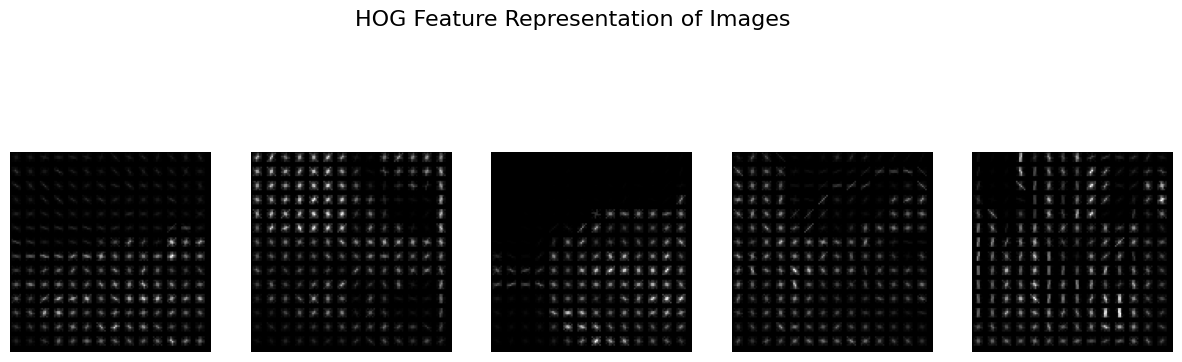

In [3]:
# Extract HOG features from ALL images
hog_features = []
for image in images:
    features, _ = hog(image, pixels_per_cell=(9, 9), cells_per_block=(2, 2), 
                      orientations=10, block_norm='L2-Hys', visualize=True)
    hog_features.append(features)
    
X = np.array(hog_features)
y = np.array(labels)

# Extract and display HOG features for the first 5 images
fig, axs = plt.subplots(1, 5, figsize=(15, 5))  # Creating subplots
hog_features = []

for i in range(5):
    # Extract HOG features and visualize
    features, hog_image = hog(images[i], pixels_per_cell=(9, 9), cells_per_block=(2, 2), 
                              orientations=10, block_norm='L2-Hys', visualize=True)
    hog_features.append(features)  # Store the HOG features
    
    # Display HOG image
    axs[i].imshow(hog_image, cmap='gray')
    axs[i].axis('off')  # Hide axes

plt.suptitle("HOG Feature Representation of Images", fontsize=16)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [6]:
# Predict on the test set
y_pred = knn_model.predict(X_test)

In [7]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred)
report_knn = classification_report(y_test, y_pred)

In [8]:
print("KNN Model Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)

KNN Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



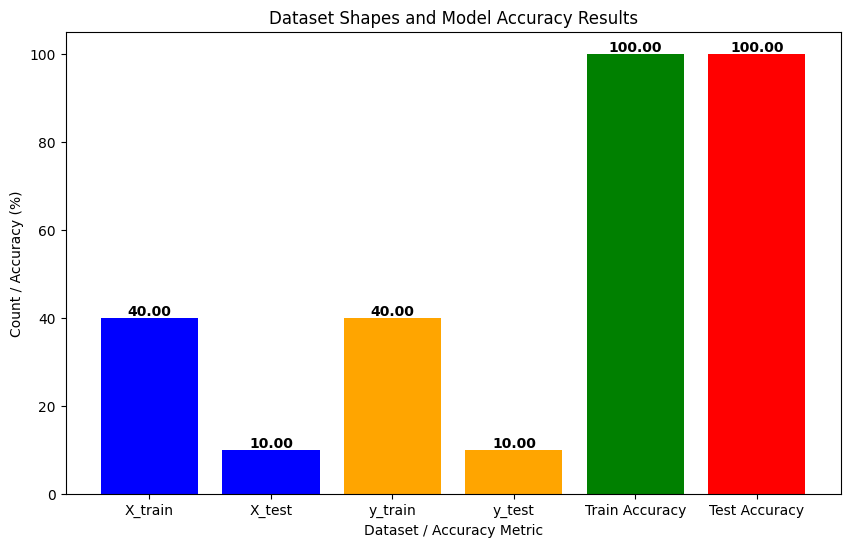

In [9]:
# Display the shapes of the datasets
X_train_shape = X_train.shape[0]
X_test_shape = X_test.shape[0]
y_train_shape = y_train.shape[0]
y_test_shape = y_test.shape[0]

# Calculate training and testing accuracies
train_accuracy = knn_model.score(X_train, y_train)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_pred)  # Testing accuracy

# Plotting the information in a bar chart
labels = ['X_train', 'X_test', 'y_train', 'y_test', 'Train Accuracy', 'Test Accuracy']
values = [X_train_shape, X_test_shape, y_train_shape, y_test_shape, train_accuracy * 100, test_accuracy * 100]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'blue', 'orange', 'orange', 'green', 'red'])
plt.xlabel("Dataset / Accuracy Metric")
plt.ylabel("Count / Accuracy (%)")
plt.title("Dataset Shapes and Model Accuracy Results")

# Adding data labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()